In [1]:
import pandas as pd
from typing import List, Union, Literal, Dict
import numpy as np
from tqdm import tqdm
from crypto_momentum_portfolios.data_loader import CryptoDataLoader,CryptoDataLoaderQIL
from crypto_momentum_portfolios.utils import get_rebalance_dates

dl = CryptoDataLoaderQIL() #CryptoDataLoader()
dl.assets

Fetching symbols...: 100%|██████████| 17/17 [00:00<00:00, 24.31it/s]


['TRX-USDT',
 'MATIC-USDT',
 'BNB-USDT',
 'LTC-USDT',
 'XRP-USDT',
 'DOGE-USDT',
 'LINK-USDT',
 'XLM-USDT',
 'AVAX-USDT',
 'BTC-USDT',
 'DASH-USDT',
 'XTZ-USDT',
 'SOL-USDT',
 'ETH-USDT',
 'ADA-USDT',
 'ETC-USDT',
 'BCH-USDT']

In [2]:
MOMENTUM_LOOKBACK = 30
univers = (
    dl.get_crypto(
        "all",
        data_frequency="daily",
        fields=["price","market_cap","momentum","returns"],
        flatten_fields_with_crypto=False,
        momentum_lookback=MOMENTUM_LOOKBACK,
    )
    .dropna()
    .loc["2021-10-10":]
)
univers.head()

price                                                  \
            TRX-USDT MATIC-USDT BNB-USDT LTC-USDT XRP-USDT DOGE-USDT   
Date                                                                   
2021-10-10  0.097470     1.2453  404.261  174.852  1.13500   0.22879   
2021-10-11  0.097106     1.2426  413.194  179.257  1.13643   0.23108   
2021-10-12  0.095528     1.2227  444.377  172.547  1.10188   0.22609   
2021-10-13  0.097889     1.2416  470.652  177.612  1.12720   0.23258   
2021-10-14  0.097301     1.2643  472.974  181.337  1.13342   0.23261   

                                                   ...   returns            \
           LINK-USDT  XLM-USDT AVAX-USDT BTC-USDT  ...  XLM-USDT AVAX-USDT   
Date                                               ...                       
2021-10-10   25.5490  0.331004    56.546  54663.6  ... -0.062726 -0.068696   
2021-10-11   25.2132  0.344559    55.326  57471.9  ...  0.040951 -0.021575   
2021-10-12   24.6387  0.332827    54.247  56004.5  ... -0.034049 -0.019503   
2021-10-13   25.6442  0.368083    54.986  57367.2  ...  0.105929  0.013623   
2021-10-14   26.7148  0.369613    56.182  57344.9  ...  0.004157  0.021751   

                                                                        \
            BTC-USDT DASH-USDT  XTZ-USDT  SOL-USDT  ETH-USDT  ADA-USDT   
Date                                                                     
2021-10-10 -0.005170 -0.058672 -0.084548 -0.058450 -0.045093 -0.035400   
2021-10-11  0.051374  0.003950 -0.011189 -0.018492  0.037159 -0.007222   
2021-10-12 -0.025532 -0.012898  0.031167  0.051396 -0.014099 -0.024714   
2021-10-13  0.024332  0.014893  0.025790 -0.029074  0.033296  0.033770   
2021-10-14 -0.000389  0.018602 -0.023360  0.014145  0.050877 -0.007687   

                                
            ETC-USDT  BCH-USDT  
Date                            
2021-10-10 -0.048963 -0.047856  
2021-10-11  0.019395  0.028918  
2021-10-12 -0.023415 -0.023335  
2021-10-13  0.013866  0.009734  
2021-10-14  0.020444  0.009489  

[5 rows x 68 columns]

In [3]:
univers

price                                                  \
            TRX-USDT MATIC-USDT BNB-USDT LTC-USDT XRP-USDT DOGE-USDT   
Date                                                                   
2021-10-10  0.097470     1.2453  404.261  174.852  1.13500   0.22879   
2021-10-11  0.097106     1.2426  413.194  179.257  1.13643   0.23108   
2021-10-12  0.095528     1.2227  444.377  172.547  1.10188   0.22609   
2021-10-13  0.097889     1.2416  470.652  177.612  1.12720   0.23258   
2021-10-14  0.097301     1.2643  472.974  181.337  1.13342   0.23261   
...              ...        ...      ...      ...      ...       ...   
2023-12-19  0.100619     0.7661  252.770   70.707  0.60445   0.09023   
2023-12-20  0.102757     0.7755  260.231   69.817  0.61710   0.09151   
2023-12-21  0.104629     0.8164  272.161   70.900  0.62399   0.09493   
2023-12-22  0.104180     0.8500  267.926   71.394  0.61908   0.09331   
2023-12-23  0.106518     0.8485  269.562   72.023  0.61812   0.09294   

                                                   ...   returns            \
           LINK-USDT  XLM-USDT AVAX-USDT BTC-USDT  ...  XLM-USDT AVAX-USDT   
Date                                               ...                       
2021-10-10   25.5490  0.331004    56.546  54663.6  ... -0.062726 -0.068696   
2021-10-11   25.2132  0.344559    55.326  57471.9  ...  0.040951 -0.021575   
2021-10-12   24.6387  0.332827    54.247  56004.5  ... -0.034049 -0.019503   
2021-10-13   25.6442  0.368083    54.986  57367.2  ...  0.105929  0.013623   
2021-10-14   26.7148  0.369613    56.182  57344.9  ...  0.004157  0.021751   
...              ...       ...       ...      ...  ...       ...       ...   
2023-12-19   14.0905  0.119486    39.729  42268.6  ... -0.014573 -0.034532   
2023-12-20   14.2492  0.121920    43.420  43666.0  ...  0.020371  0.092904   
2023-12-21   15.3086  0.124673    45.961  43858.2  ...  0.022580  0.058521   
2023-12-22   15.2946  0.125215    44.131  43541.1  ...  0.004347 -0.039816   
2023-12-23   15.8540  0.126449    44.947  43734.4  ...  0.009855  0.018490   

                                                                        \
            BTC-USDT DASH-USDT  XTZ-USDT  SOL-USDT  ETH-USDT  ADA-USDT   
Date                                                                     
2021-10-10 -0.005170 -0.058672 -0.084548 -0.058450 -0.045093 -0.035400   
2021-10-11  0.051374  0.003950 -0.011189 -0.018492  0.037159 -0.007222   
2021-10-12 -0.025532 -0.012898  0.031167  0.051396 -0.014099 -0.024714   
2021-10-13  0.024332  0.014893  0.025790 -0.029074  0.033296  0.033770   
2021-10-14 -0.000389  0.018602 -0.023360  0.014145  0.050877 -0.007687   
...              ...       ...       ...       ...       ...       ...   
2023-12-19 -0.009077 -0.030813 -0.030094 -0.018852 -0.018660 -0.043748   
2023-12-20  0.033060  0.020977  0.019749  0.126162  0.011338  0.023191   
2023-12-21  0.004402  0.032103  0.053103  0.141337  0.016777  0.077669   
2023-12-22 -0.007230  0.014308  0.067966 -0.003751  0.032090 -0.037240   
2023-12-23  0.004439 -0.006440 -0.029674  0.032706 -0.011665 -0.013179   

                                
            ETC-USDT  BCH-USDT  
Date                            
2021-10-10 -0.048963 -0.047856  
2021-10-11  0.019395  0.028918  
2021-10-12 -0.023415 -0.023335  
2021-10-13  0.013866  0.009734  
2021-10-14  0.020444  0.009489  
...              ...       ...  
2023-12-19 -0.012982 -0.013107  
2023-12-20  0.026814  0.020299  
2023-12-21  0.023501  0.014845  
2023-12-22  0.053033  0.007593  
2023-12-23 -0.024597 -0.015880  

[805 rows x 68 columns]

In [5]:
def rank_by_field(univers: Union[pd.DataFrame, pd.Series], field: str):
    return univers[f"{field}"].iloc[-1].sort_values(ascending=False).index.to_list()


def rank_by_field_for_rows(row: Union[pd.DataFrame, pd.Series], field: str):
    return row[f"{field}"].sort_values(ascending=False).index.to_list()




Weight drift :

$$w_i^k=\frac{w_{i-1}^k\times (1+r_i^k)}{\sum_{j=1}^n w_{i-1}^j\times(1+r_i^j)}$$

For asset $k$ at time $i$ given $n$ asset in the portfolio.


# Building a benchmark

## Capitalization weighted index

In [6]:
def capi_weighted_assets(selected_assets: list[str], selected_assets_capi:list[float]) -> Dict[str, float]:
    
    return {asset: selected_assets_capi[i] / sum(selected_assets_capi) for i, asset in enumerate(selected_assets)}

In [15]:
# pre assign memory for speed


returns_histo, weights_histo = ([], [])
REBALANCE_DATES = get_rebalance_dates(
    univers.index[0], univers.index[-1], "quarter_start"
)

TRANSACTION_COST = 0.001  # Binance taker spot fees
SLIPPAGE_EFFECT = 0.0005  # 0.05% slippage
# TOP_K = 8
SIDE: Literal["long", "short"] = "long"
SIDE_TO_INT: Dict[Literal["long", "short"], int] = {"long": 1, "short": -1}

for index, row in tqdm(
    univers.iterrows(),
    desc="Backtesting the strategy...",
    total=len(univers),
    leave=False,
):
    if index in REBALANCE_DATES or index == univers.index[0]:
        print(f"Rebalancing the portfolio on {index}...")
        
        securities = row["price"].index.to_list()
        weights = capi_weighted_assets(securities,row["market_cap"])

    weights_histo.append(weights)
    returns = univers.loc[index, "returns"][securities].to_numpy()
    returns_plus_1 = returns + 1
    weights_np = np.array(list(weights.values()))
    if index in REBALANCE_DATES or index == univers.index[0]:
        returns_histo.append(
            ((returns @ weights_np) - TRANSACTION_COST * len(securities) - SLIPPAGE_EFFECT)
            * SIDE_TO_INT[SIDE]
        )
    else:
        returns_histo.append((returns @ weights_np) * SIDE_TO_INT[SIDE])
    new_weights = {
        sec: unit_weight
        for sec, unit_weight in zip(
            securities,
            (weights_np * returns_plus_1) / (returns_plus_1 @ np.array(weights_np)),
        )
    }
    weights = new_weights

Backtesting the strategy...:   9%|▉         | 76/805 [00:00<00:01, 379.55it/s]

Rebalancing the portfolio on 2021-10-10 00:00:00...
Rebalancing the portfolio on 2022-01-01 00:00:00...


Backtesting the strategy...:  25%|██▌       | 205/805 [00:00<00:02, 287.27it/s]

Rebalancing the portfolio on 2022-04-01 00:00:00...


Backtesting the strategy...:  40%|███▉      | 320/805 [00:01<00:01, 268.17it/s]

Rebalancing the portfolio on 2022-07-01 00:00:00...


Backtesting the strategy...:  50%|████▉     | 401/805 [00:01<00:01, 332.10it/s]

Rebalancing the portfolio on 2022-10-01 00:00:00...


Backtesting the strategy...:  62%|██████▏   | 497/805 [00:01<00:01, 287.24it/s]

Rebalancing the portfolio on 2023-01-01 00:00:00...


Backtesting the strategy...:  69%|██████▉   | 555/805 [00:01<00:00, 270.03it/s]

Rebalancing the portfolio on 2023-04-01 00:00:00...


Backtesting the strategy...:  82%|████████▏ | 661/805 [00:02<00:00, 245.98it/s]

Rebalancing the portfolio on 2023-07-01 00:00:00...


Backtesting the strategy...:  95%|█████████▌| 766/805 [00:02<00:00, 253.01it/s]

Rebalancing the portfolio on 2023-10-01 00:00:00...


In [16]:
weights_df = pd.DataFrame(weights_histo, index=univers.index).fillna(0)

returns_df = pd.DataFrame(
    returns_histo, columns=["Startegy_returns"], index=univers.index, dtype=float
)
returns_df["Startegy_cumulative_returns"] = (
    1 + returns_df["Startegy_returns"]
).cumprod()
returns_df["Bench_returns"] = univers["returns"]["BTC-USDT"]
returns_df["Bench_cumulative_returns"] = (1 + returns_df["Bench_returns"]).cumprod()

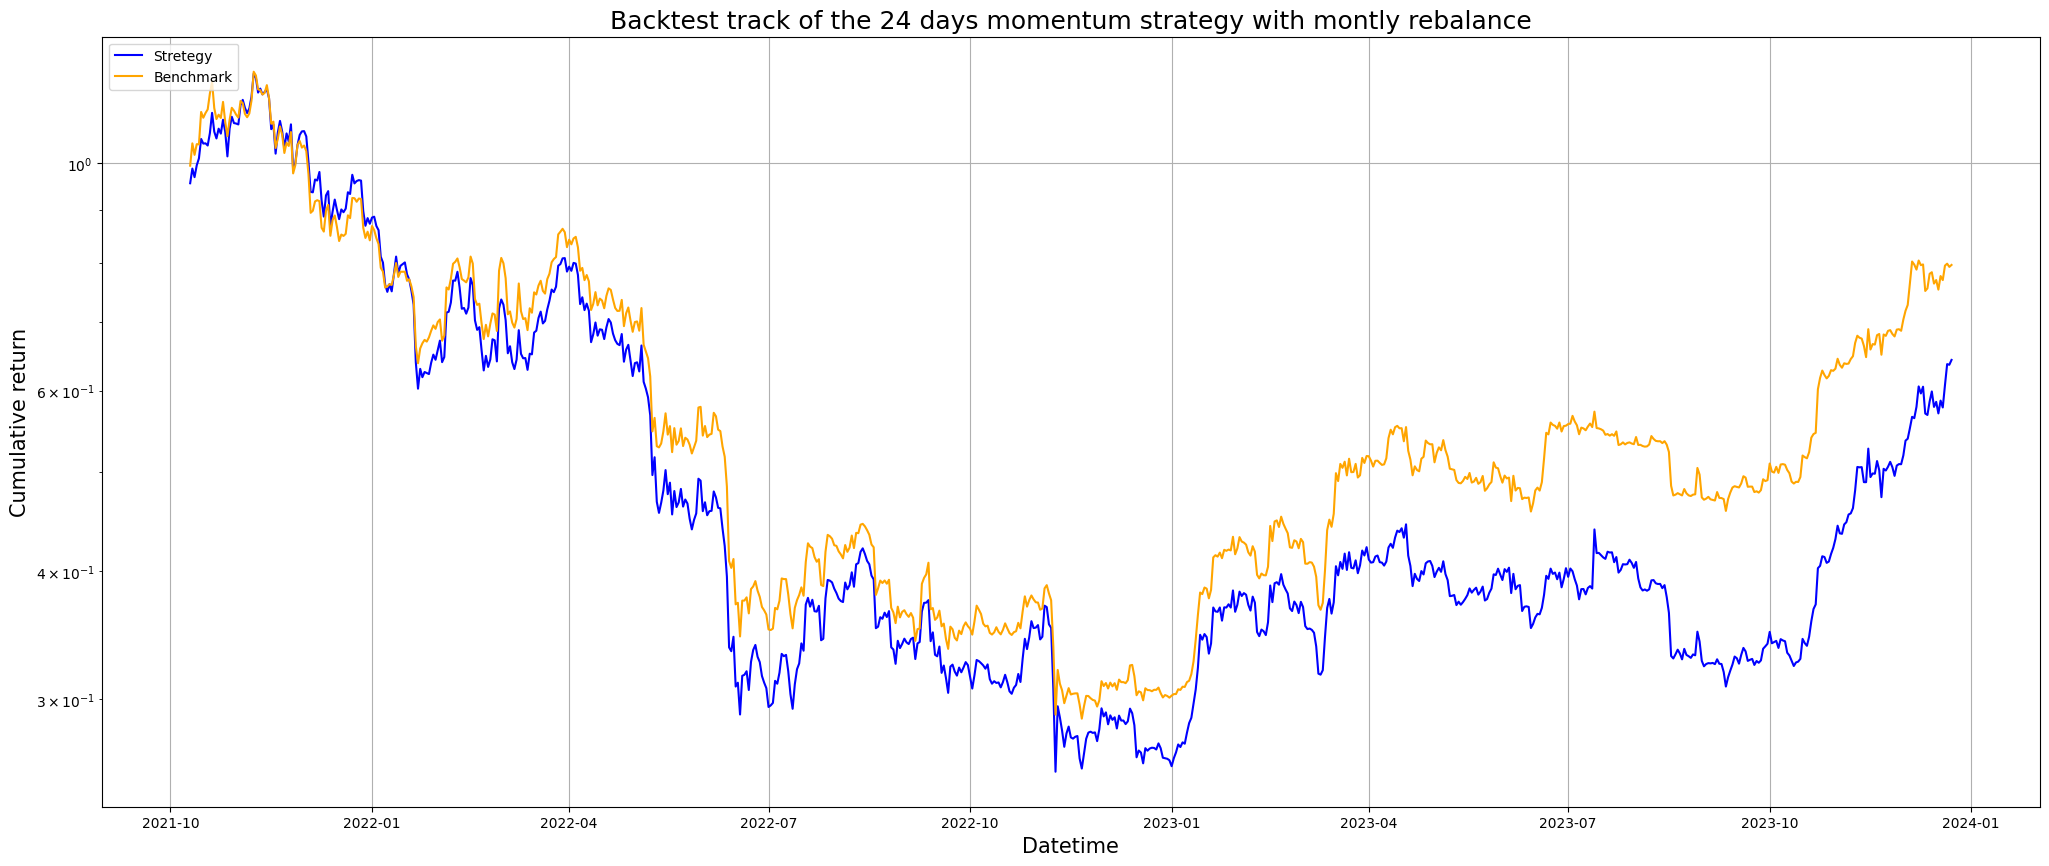

In [17]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 1, figsize=(25, 10))
ax.set_title(
    "Backtest track of the 24 days momentum strategy with montly rebalance", fontsize=18
)
ax.plot(
    returns_df["Startegy_cumulative_returns"],
    label="Stretegy",
    color="blue",
)

ax.plot(returns_df["Bench_cumulative_returns"], label="Benchmark", color="orange")
ax.set_xlabel("Datetime", fontsize=15)
ax.set_ylabel("Cumulative return", fontsize=15)
ax.legend(loc="upper left")
ax.set_yscale("log")

ax.grid()

## Equal weighted index

In [ ]:
def equal_weighted_assets(selected_assets: list[str]) -> Dict[str, float]:
    return {asset: 1 / len(selected_assets) for asset in selected_assets}


## BITCOIN

In [ ]:
# pre assign memory for speed


returns_histo, weights_histo = ([], [])
REBALANCE_DATES = get_rebalance_dates(
    univers.index[0], univers.index[-1], "quarter_start"
)

TRANSACTION_COST = 0.001  # Binance taker spot fees
SLIPPAGE_EFFECT = 0.0005  # 0.05% slippage
TOP_K = 8
SIDE: Literal["long", "short"] = "short"
SIDE_TO_INT: Dict[Literal["long", "short"], int] = {"long": 1, "short": -1}

for index, row in tqdm(
    univers.iterrows(),
    desc="Backtesting the strategy...",
    total=len(univers),
    leave=False,
):
    if index in REBALANCE_DATES or index == univers.index[0]:
        print(f"Rebalancing the portfolio on {index}...")
        securities = rank_by_field_for_rows(row, "momentum")[-TOP_K:]
        weights = equal_weighted_assets(securities)

    weights_histo.append(weights)
    returns = univers.loc[index, "returns"][securities].to_numpy()
    returns_plus_1 = returns + 1
    weights_np = np.array(list(weights.values()))
    if index in REBALANCE_DATES or index == univers.index[0]:
        returns_histo.append(
            ((returns @ weights_np) - TRANSACTION_COST * TOP_K - SLIPPAGE_EFFECT)
            * SIDE_TO_INT[SIDE]
        )
    else:
        returns_histo.append((returns @ weights_np) * SIDE_TO_INT[SIDE])
    new_weights = {
        sec: unit_weight
        for sec, unit_weight in zip(
            securities,
            (weights_np * returns_plus_1) / (returns_plus_1 @ np.array(weights_np)),
        )
    }
    weights = new_weights

In [ ]:
weights_df = pd.DataFrame(weights_histo, index=univers.index).fillna(0)
returns_df = pd.DataFrame(
    returns_histo, columns=["Startegy_returns"], index=univers.index, dtype=float
)
returns_df["Startegy_cumulative_returns"] = (
    1 + returns_df["Startegy_returns"]
).cumprod()
returns_df["Bench_returns"] = univers["returns"]["bitcoin"]
returns_df["Bench_cumulative_returns"] = (1 + returns_df["Bench_returns"]).cumprod()

In [ ]:
returns_df

## Result analysis


In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 1, figsize=(25, 10))
ax.set_title(
    "Backtest track of the 24 days momentum strategy with montly rebalance", fontsize=18
)
ax.plot(
    returns_df["Startegy_cumulative_returns"],
    label="Stretegy",
    color="blue",
)

ax.plot(returns_df["Bench_cumulative_returns"], label="Benchmark", color="orange")
ax.set_xlabel("Datetime", fontsize=15)
ax.set_ylabel("Cumulative return", fontsize=15)
ax.legend(loc="upper left")
ax.set_yscale("log")

ax.grid()

In [ ]:
from quant_invest_lab.reports import (
    print_portfolio_strategy_report,
    plot_from_trade_df_and_ptf_optimization,
)

print_portfolio_strategy_report(
    portfolio_returns=pd.Series(returns_histo, index=univers.index),
    benchmark_returns=univers["returns"]["bitcoin"],
    timeframe="1day",
)

In [ ]:
alloc = pd.DataFrame(weights_df.mean())
alloc.columns = [0]
alloc = alloc.T


plot_from_trade_df_and_ptf_optimization(
    portfolio_returns=returns_df["Startegy_returns"],
    benchmark_returns=returns_df["Bench_returns"],
    asset_allocation_dataframe=alloc,
)

## Weights analysis


In [ ]:
weights_df